# Modeling

With the further analysis and feature engineering complete, the next steps involve modeling. We'll develop and evaluate predictive models for forecasting Brent oil prices using the new features. Here’s an outline of the steps for modeling:

Train-Test Split: Split the data into training and test sets.
Model Selection: Choose appropriate models for time series forecasting (e.g., ARIMA, SARIMA, GARCH).
Model Training: Train the selected models on the training data.
Model Evaluation: Evaluate the models on the test data using appropriate metrics.
Forecasting: Use the best model to make future price predictions.
Model Validation: Validate the model's predictions.

### Load the Processed Data

In [3]:
# Load the cleaned data with features from the CSV file
import pandas as pd

# File path to the processed data
csv_file_path = '../data/cleaned_data_with_features.csv'

# Load the data into a DataFrame
data_clean = pd.read_csv(csv_file_path)

# Convert 'Date' column to datetime
data_clean['Date'] = pd.to_datetime(data_clean['Date'])

# Display the first few rows of the dataframe
data_clean.head()

,Date,Price,Price_MA30,Price_MA90,Price_Rolling_STD30,Price_Rolling_STD90,Price_Lag1,Price_Lag7,Price_Lag30
0,1987-09-23,18.48,18.312333,18.999556,0.432177,0.766040,18.48,18.15,19.50
1,1987-09-24,18.68,18.288333,19.000111,0.387361,0.765787,18.48,18.53,19.40
2,1987-09-25,18.60,18.266667,19.001778,0.347884,0.764739,18.68,18.53,19.25
3,1987-09-28,18.65,18.260000,19.002889,0.338098,0.764148,18.60,18.43,18.85
4,1987-09-29,18.50,18.251667,19.001778,0.328550,0.764813,18.65,18.30,18.75


## Train-Test Split
We'll split the data into training and test sets to evaluate the model performance on unseen data.

In [4]:
from sklearn.model_selection import train_test_split

# Features and target variable
features = data_clean[['Price_MA30', 'Price_MA90', 'Price_Rolling_STD30', 'Price_Rolling_STD90', 'Price_Lag1', 'Price_Lag7', 'Price_Lag30']]
target = data_clean['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (7137, 7)
Test set shape: (1785, 7)


### Model Selection and Training
We'll start with the ARIMA model for time series forecasting.

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Train ARIMA model
model = ARIMA(y_train, order=(5, 1, 0))  # (p, d, q) order
arima_model = model.fit()

print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 7137
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10580.967
Date:                Fri, 21 Feb 2025   AIC                          21173.934
Time:                        17:12:17   BIC                          21215.172
Sample:                             0   HQIC                         21188.130
                               - 7137                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0367      0.008      4.831      0.000       0.022       0.052
ar.L2         -0.0076      0.007     -1.095      0.273      -0.021       0.006
ar.L3         -0.0111      0.007     -1.675      0.0

### Model Evaluation
Evaluate the ARIMA model on the test data.

Mean Squared Error: 754.4196108454922


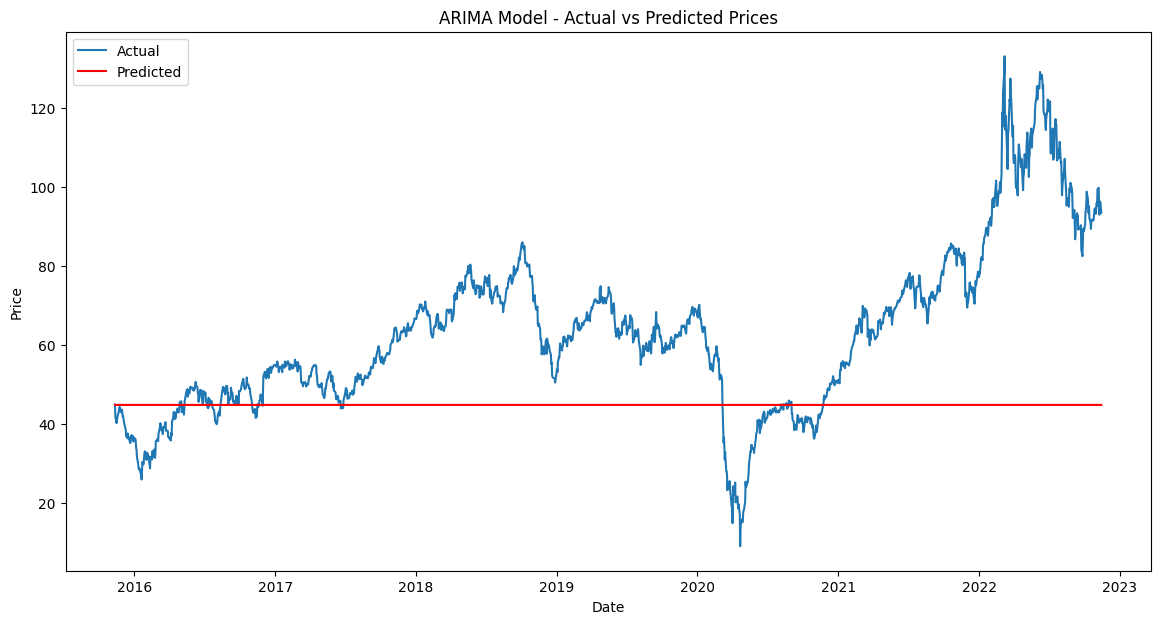

In [6]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Forecast using ARIMA model
y_pred = arima_model.forecast(steps=len(y_test))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the predictions vs actual values
plt.figure(figsize=(14, 7))
plt.plot(data_clean['Date'][-len(y_test):], y_test, label='Actual')
plt.plot(data_clean['Date'][-len(y_test):], y_pred, label='Predicted', color='red')
plt.title('ARIMA Model - Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 3137332.2324622665
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1038373722262.1539
Iteration:      3,   Func. Count:     19,   Neg. LLF: 42167.75601317353
Iteration:      4,   Func. Count:     26,   Neg. LLF: 28762.93765418586
Iteration:      5,   Func. Count:     31,   Neg. LLF: 29701.142543035447
Iteration:      6,   Func. Count:     37,   Neg. LLF: 29836.503152355348
Iteration:      7,   Func. Count:     43,   Neg. LLF: 28113.074085535336
Iteration:      8,   Func. Count:     49,   Neg. LLF: 26393.217797123794
Iteration:      9,   Func. Count:     54,   Neg. LLF: 27487.819799598306
Iteration:     10,   Func. Count:     64,   Neg. LLF: 28618.40560261148
Iteration:     11,   Func. Count:     71,   Neg. LLF: 26007.427654937244
Iteration:     12,   Func. Count:     76,   Neg. LLF: 26002.715346815814
Iteration:     13,   Func. Count:     81,   Neg. LLF: 26001.21074680867
Iteration:     14,   Func. Count:     86,   Neg. LLF: 2

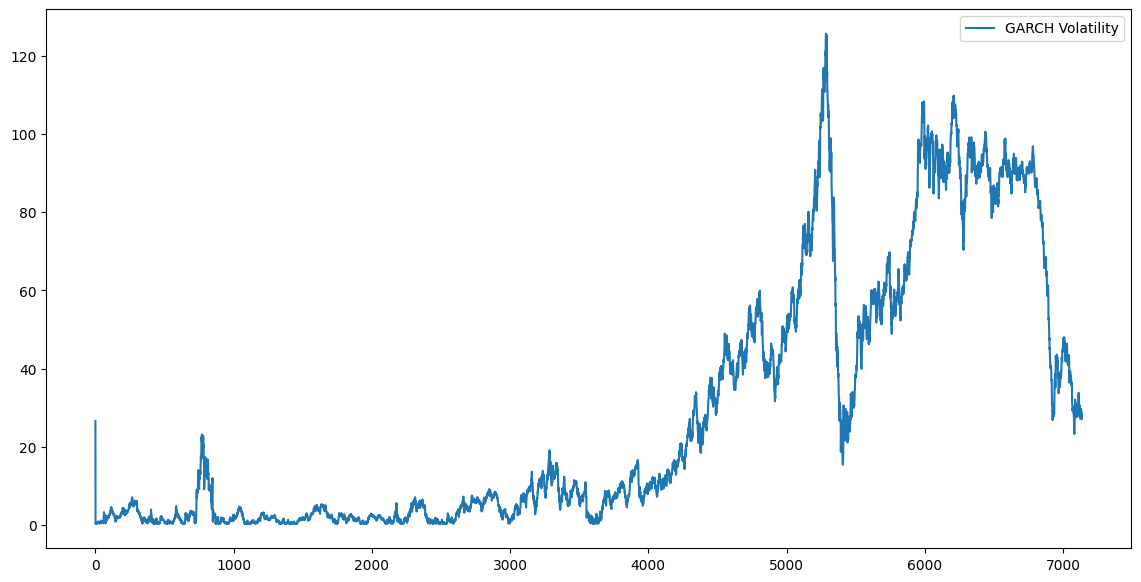

In [11]:
from arch import arch_model  # For GARCH model
# GARCH Model (for volatility)
garch_model = arch_model(y_train, vol='Garch', p=1, q=1).fit()
volatility = garch_model.conditional_volatility

plt.figure(figsize=(14, 7))
plt.plot(volatility, label='GARCH Volatility')
plt.legend()
plt.show()

In [ ]:
# pip install arch

   -------------------------------------- 927.1/927.1 kB 559.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
